# Titanic - Machine Learning from Disaster

## Load and normalize the data

In [4]:
from fastcore.all import Path
from fastai.tabular.all import TabularDataLoaders, Categorify, FillStrategy, FillMissing, Normalize
from fastai.data.all import CategoryBlock


root_path = Path()
train_path = "titanic/train.csv"
dataloaders = TabularDataLoaders.from_csv(
  csv=root_path/train_path,
  procs=[Categorify, FillMissing(fill_strategy=FillStrategy.median)],
  cat_names=["Pclass", "Sex", "Embarked"],
  cont_names=["Age", "Parch", "Fare"],
  y_names=["Survived"],
  y_block=CategoryBlock
)

print(dataloaders.procs.categorify)
dataloaders.show_batch()

Categorify -- {'classes': {'Pclass': ['#na#', 1, 2, 3], 'Sex': ['#na#', 'female', 'male'], 'Embarked': ['#na#', 'C', 'Q', 'S']}}:
encodes: (object,object) -> encodes
decodes: (object,object) -> decodes



,Pclass,Sex,Embarked,Age,Parch,Fare,Survived
0,1,female,S,21.0,0.0,77.958298,1
1,2,female,S,41.0,1.0,19.500000,1
2,1,female,S,39.0,1.0,79.650002,1
3,1,female,S,35.0,0.0,53.099998,1
4,3,male,S,24.0,0.0,7.050000,0
5,3,female,Q,32.0,1.0,15.500000,0
6,3,female,S,16.0,2.0,46.900002,0
7,3,male,S,40.5,2.0,14.500000,0
8,1,male,C,35.0,0.0,512.329224,1
9,3,male,Q,28.5,0.0,6.858300,0


## Setup and train the model

In [5]:
from fastai.tabular.all import tabular_learner
from fastai.metrics import accuracy


learner = tabular_learner(dataloaders, metrics=[accuracy])
learner.fit_one_cycle(20)

## Verify model performance and results

,Pclass,Sex,Embarked,Age,Parch,Fare,Survived,Survived_pred
0,3.0,2.0,2.0,28.5,0.0,7.750000,0.0,0.0
1,2.0,1.0,3.0,6.0,1.0,33.000000,1.0,1.0
2,1.0,2.0,3.0,48.0,0.0,52.000000,1.0,0.0
3,1.0,1.0,1.0,23.0,0.0,113.275002,1.0,1.0
4,3.0,2.0,3.0,51.0,0.0,8.050000,0.0,0.0
5,1.0,1.0,3.0,14.0,2.0,120.000000,1.0,1.0
6,3.0,2.0,3.0,1.0,2.0,20.575001,1.0,1.0
7,3.0,2.0,3.0,9.0,2.0,20.525000,1.0,0.0
8,2.0,2.0,3.0,42.0,0.0,13.000000,0.0,0.0
9,3.0,2.0,3.0,24.0,0.0,7.895800,0.0,0.0


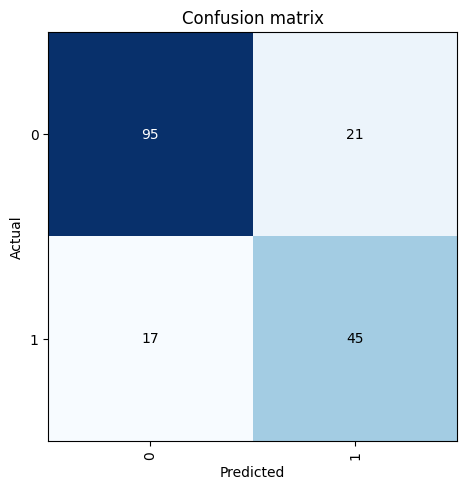

In [6]:
from fastai.interpret import ClassificationInterpretation


interpret = ClassificationInterpretation.from_learner(learner)
interpret.plot_confusion_matrix()
interpret.show_results(list(range(10)))